# Python example

## How to load the model

In [1]:
import swami    # SWAMI library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mcm = swami.MCM()

## Single point

In [3]:
out = mcm.run(
    altitude=100,
    latitude=3,
    longitude=15,
    local_time=12,
    day_of_year=53,
    f107=70,
    f107m=69,
    kp1=1,
    kp2=1,
    get_winds=True,
    get_uncertainty=True
)
print(f"Results are {out}\n")
print(f"Density is {out.dens:.3e} g/cm3")
print(f"Temperature is {out.temp:.2f} K")

Results are MCMOutput(dens=2.829354049223008e-10, temp=178.8555615350168, wmm=None, d_H=None, d_He=None, d_O=None, d_N2=None, d_O2=None, d_N=None, tinf=None, dens_unc=None, dens_std=1.749150709600944e-11, temp_std=9.60724715517875, xwind=nan, ywind=nan, xwind_std=28.02476670220009, ywind_std=21.61078819732512, alti=100.0, lati=3.0, longi=15.0, loct=12.0, doy=53.0, f107=70.0, f107m=69.0, kp1=1.0, kp2=1.0)

Density is 2.829e-10 g/cm3
Temperature is 178.86 K


## Altitude profile: temperature and density

In [4]:
altitudes = np.arange(0.0, 300, 10)
temp = []
dens = []

for h in altitudes:
    out = mcm.run(
        altitude=h,
        latitude=3,
        longitude=15,
        local_time=12,
        day_of_year=53,
        f107=70,
        f107m=69,
        kp1=1,
        kp2=1,
    )
    dens.append(out.dens)
    temp.append(out.temp)

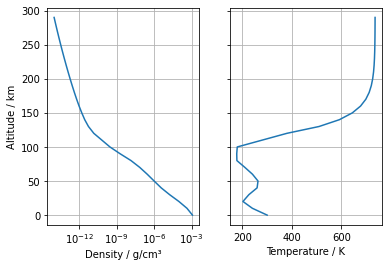

In [5]:
f, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(dens, altitudes)
ax[0].set_xscale("log")
ax[0].set_xlabel("Density / g/cm³")
ax[0].set_ylabel("Altitude / km")

ax[1].plot(temp, altitudes)
ax[1].set_xlabel("Temperature / K")

ax[0].grid(True)
ax[1].grid(True)

## Map at altitude: temperature and density

In [6]:
lati = np.arange(-90, 90, 10)
loct = np.arange(0, 24, 3)

temp = np.zeros((len(lati), len(loct)))
dens = np.zeros((len(lati), len(loct)))

for i, lat in enumerate(lati):
    for j, lt in enumerate(loct):
        out = mcm.run(
            altitude=160,
            latitude=lat,
            longitude=15,
            local_time=lt,
            day_of_year=53,
            f107=70,
            f107m=69,
            kp1=1,
            kp2=1,
        )
        dens[i,j] = out.dens
        temp[i,j] = out.temp

Text(0.5, 0, 'Local time / h')

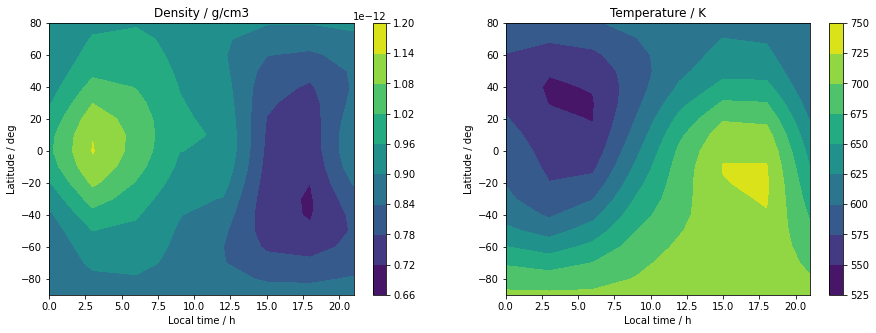

In [7]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

lt, la = np.meshgrid(loct, lati)

c = ax[0].contourf(lt, la, dens)
f.colorbar(c, ax=ax[0])
ax[0].set_title("Density / g/cm3")
ax[0].set_ylabel("Latitude / deg")
ax[0].set_xlabel("Local time / h")

c = ax[1].contourf(lt, la, temp)
f.colorbar(c, ax=ax[1])
ax[1].set_title("Temperature / K")
ax[1].set_ylabel("Latitude / deg")
ax[1].set_xlabel("Local time / h")

    


In [8]:
lati = np.arange(-90, 90, 10)
loct = np.arange(0, 24, 3)

xwind = np.zeros((len(lati), len(loct)))
ywind = np.zeros((len(lati), len(loct)))

for i, lat in enumerate(lati):
    for j, lt in enumerate(loct):
        out = mcm.run(
            altitude=80,
            latitude=lat,
            longitude=15,
            local_time=lt,
            day_of_year=53,
            f107=70,
            f107m=69,
            kp1=1,
            kp2=1,
            get_winds=True
        )
        xwind[i,j] = out.xwind
        ywind[i,j] = out.ywind

Text(0.5, 0, 'Local time / h')

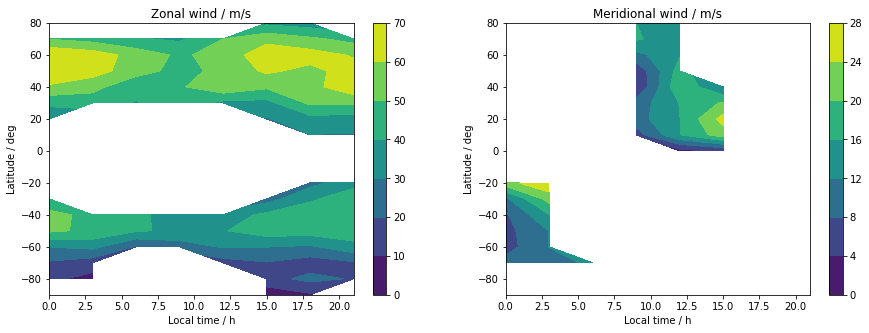

In [9]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

lt, la = np.meshgrid(loct, lati)

c = ax[0].contourf(lt, la, xwind)
f.colorbar(c, ax=ax[0])
ax[0].set_title("Zonal wind / m/s")
ax[0].set_ylabel("Latitude / deg")
ax[0].set_xlabel("Local time / h")

c = ax[1].contourf(lt, la, ywind)
f.colorbar(c, ax=ax[1])
ax[1].set_title("Meridional wind / m/s")
ax[1].set_ylabel("Latitude / deg")
ax[1].set_xlabel("Local time / h")